In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
%matplotlib inline
from matplotlib import rc
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted',font_scale=1.5)
rcParams['figure.figsize'] = 16,10

In [2]:
data = pd.read_csv('Data_preprocessed.csv')
data['ordered'].value_counts()

0    436308
1     19093
Name: ordered, dtype: int64

In [4]:
data.head()

,UserID,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,...,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered
0,a720-6b732349-a720-4862-bd21-644732,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,a0c0-6b73247c-a0c0-4bd9-8baa-797356,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,86a8-6b735c67-86a8-407b-ba24-333055,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
3,6a3d-6b736346-6a3d-4085-934b-396834,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
4,b74a-6b737717-b74a-45c3-8c6a-421140,0,1,0,1,0,0,0,0,1,...,0,0,0,1,0,0,1,0,1,1


In [5]:
(data['ordered']==1).sum()/len(data)

0.04192568747104201

adding class weights to the model


In [6]:
weight_0 = 1/((data['ordered']==0).sum())*len(data)/2.0
weight_1 = 1/((data['ordered']==1).sum())*len(data)/2.0
print(weight_0, weight_1)

0.5218801855569919 11.925862881684386


In [7]:
class_weights = {0: weight_0, 1: weight_1}


In [8]:
from funcs import train_model, plot_cm, plot_learn, data_split

X_train, y_train, X_valid, y_valid, X_test, y_test = data_split(data) #index set to True



Training data:  395401  rows returned.
Training targets:  395401  rows returned.
Validation data:  30000  rows returned.
Validation targets:  30000  rows returned.
Test data:  30000  rows returned.
Test targets:  30000  rows returned.


Epoch 1/30
12357/12357 - 7s - loss: 0.0404 - auc: 0.9967 - val_loss: 0.0377 - val_auc: 0.9970
Epoch 2/30
12357/12357 - 8s - loss: 0.0320 - auc: 0.9970 - val_loss: 0.0367 - val_auc: 0.9972
Epoch 3/30
12357/12357 - 8s - loss: 0.0313 - auc: 0.9971 - val_loss: 0.0364 - val_auc: 0.9972
Epoch 4/30
12357/12357 - 10s - loss: 0.0313 - auc: 0.9971 - val_loss: 0.0426 - val_auc: 0.9972
Epoch 5/30
12357/12357 - 8s - loss: 0.0313 - auc: 0.9971 - val_loss: 0.0365 - val_auc: 0.9972


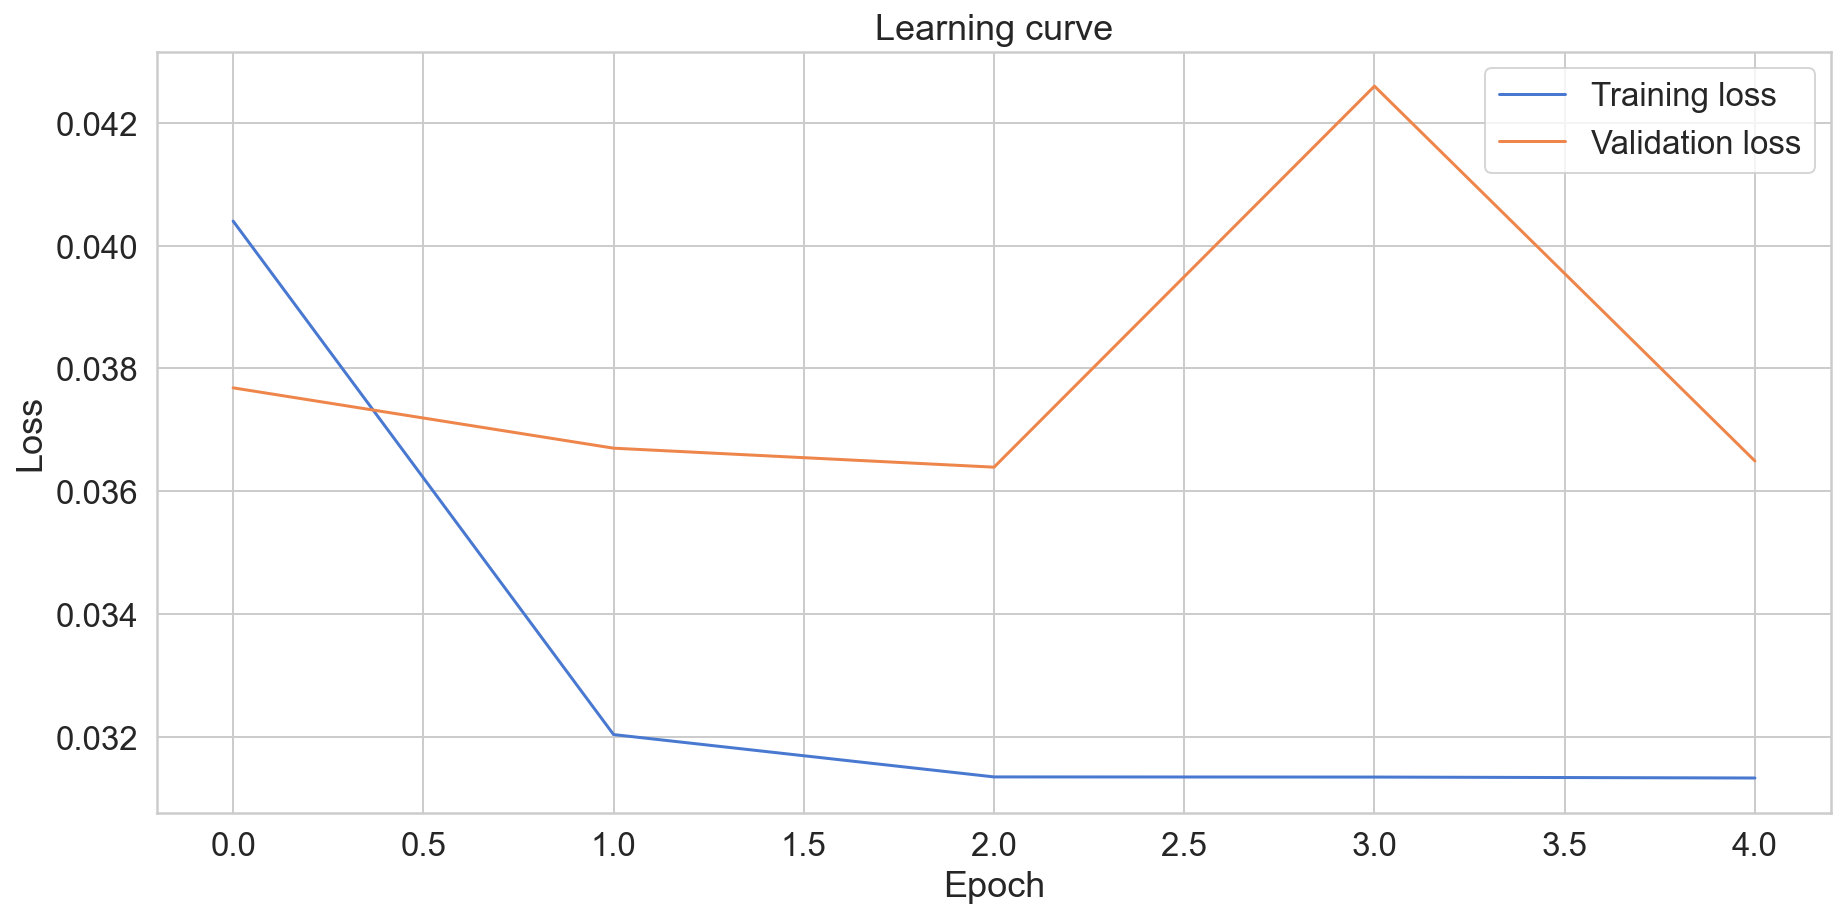

In [9]:
history_2, model_2 = train_model(X_train, y_train, X_valid, y_valid, class_w = class_weights)

plot_learn(history_2)

Now there's an obvious overfitting. Maybe the model without weights is better. Let's the performances of this one

In [10]:
from tensorflow import keras
loaded_model = keras.models.load_model('saved_models/model_1')

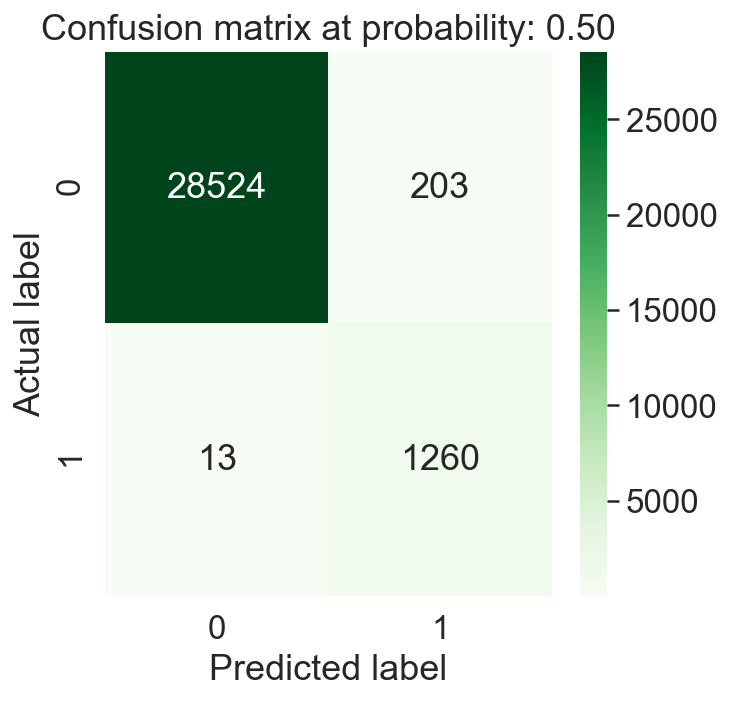

True Negatives:  28524
False Positives:  203
False Negatives:  13
True Positives:  1260
Total predicted purchases:  1463
Model precision:  0.861244019138756
Model recall:  0.9897879025923016
Model accuracy:  0.9928


In [11]:
plot_cm(model_2, X_valid, y_valid)

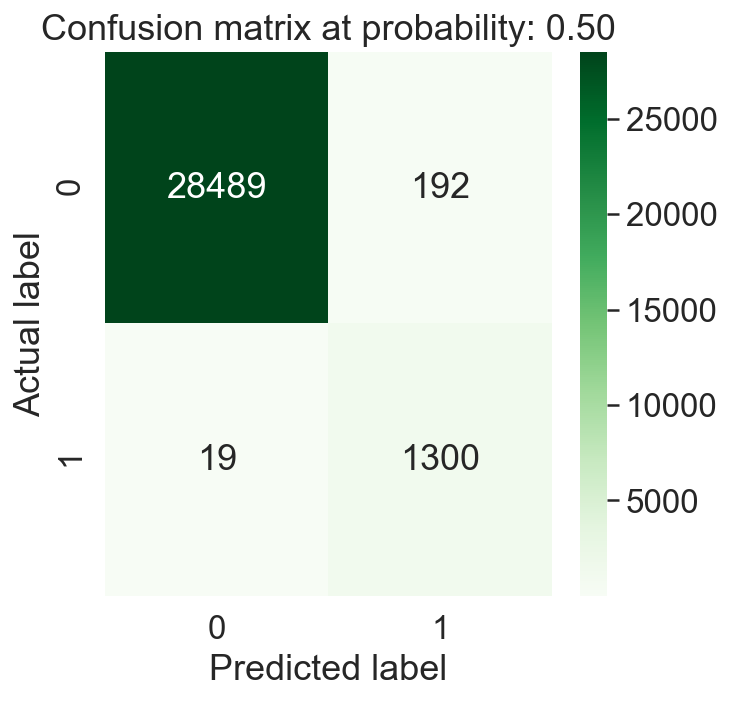

True Negatives:  28489
False Positives:  192
False Negatives:  19
True Positives:  1300
Total predicted purchases:  1492
Model precision:  0.871313672922252
Model recall:  0.9855951478392722
Model accuracy:  0.9929666666666667


In [12]:
plot_cm(model_2, X_test, y_test)

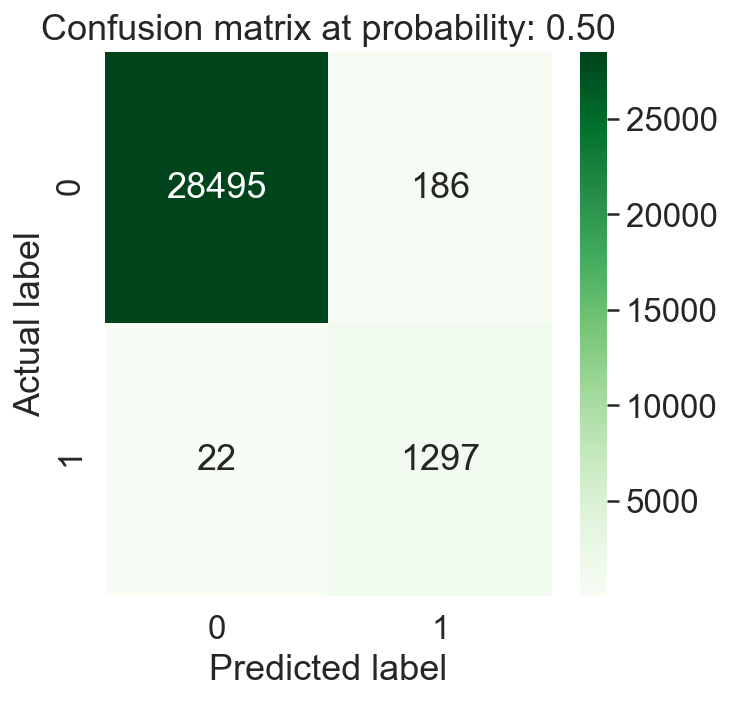

True Negatives:  28495
False Positives:  186
False Negatives:  22
True Positives:  1297
Total predicted purchases:  1483
Model precision:  0.8745785569790965
Model recall:  0.9833206974981046
Model accuracy:  0.9930666666666667


In [13]:
plot_cm(loaded_model, X_test, y_test)

## Comparison

The weights balancing does not seem to influence the performance of the model. Anyway, considering the structure of the data (and the fact that the binary features represent sequential steps taken by the customers) it's quite obvious that the balancing won't really have any huge impact on the results. However, there are more techniques besides weight balancing (over/undersampling, SMOTE, bias initialization...) I could use in the future.